In [4]:
!pip install Pillow

Generated CAPTCHA: KM6WSK


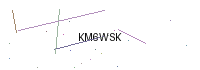

CAPTCHA verification passed.


In [6]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import random
import string

def generate_captcha_text(length=6):
    # Generate random text from letters and digits
    characters = string.ascii_uppercase + string.digits
    captcha_text = ''.join(random.choice(characters) for _ in range(length))
    return captcha_text

def generate_captcha_image(captcha_text, width=200, height=70, font_path="arial.ttf", font_size=40):
    # Create an image with a white background
    image = Image.new('RGB', (width, height), 'white')
    
    try:
        # Load a custom font (make sure to have the font file in the working directory)
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        # If the font file is not found, fallback to the default font
        font = ImageFont.load_default()
    
    draw = ImageDraw.Draw(image)

    # Add random noise - fewer lines and dots to reduce clutter
    def add_noise(draw, width, height):
        for _ in range(5):  # Add fewer random lines
            start = (random.randint(0, width), random.randint(0, height))
            end = (random.randint(0, width), random.randint(0, height))
            draw.line([start, end], fill=(random.randint(100, 200), random.randint(100, 200), random.randint(100, 200)), width=1)

        for _ in range(20):  # Add fewer random dots
            xy = (random.randint(0, width), random.randint(0, height))
            draw.point(xy, fill=(random.randint(100, 200), random.randint(100, 200), random.randint(100, 200)))

    # Add CAPTCHA text to the image with better contrast and larger font size
    text_bbox = draw.textbbox((0, 0), captcha_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    text_position = ((width - text_width) // 2, (height - text_height) // 2)
    draw.text(text_position, captcha_text, font=font, fill=(0, 0, 0))  # Black text for better contrast

    # Add some random noise to make it difficult for bots
    add_noise(draw, width, height)

    # Optional: comment out the blurring step if it makes the image unclear
    # image = image.filter(ImageFilter.BLUR)

    # Save the image
    image.save(f"{captcha_text}.png")

    return image

def verify_captcha(user_input, actual_captcha):
    # Simple verification by comparing input with the generated text
    return user_input == actual_captcha

# Main part of the program
if __name__ == "__main__":
    # Generate CAPTCHA text
    captcha_text = generate_captcha_text()
    print(f"Generated CAPTCHA: {captcha_text}")

    # Generate CAPTCHA image
    captcha_image = generate_captcha_image(captcha_text)

    # Display the image (optional, useful in GUI apps)
    captcha_image.show()

    # Simulate user input for verification
    user_input = input("Enter the CAPTCHA: ")

    # Verify the CAPTCHA
    if verify_captcha(user_input, captcha_text):
        print("CAPTCHA verification passed.")
    else:
        print("CAPTCHA verification failed.")